In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC


In [2]:
data = pd.read_csv('final_with_covid_AS.csv')
data.head()

,CountCases,BedDys,BeddystoCC,Severity,DiedCases,DiedBdDys,Hsptlsns,April,August,December,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,CovidPrd
0,17,133,7.823529,75,4,9,13,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,13,372,28.615385,63,4,34,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,106,13.250000,48,4,13,4,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,45,218,4.844444,153,3,24,42,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,24,238,9.916667,90,3,8,21,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [3]:
data['Severity'].describe()

count    54038.000000
mean        20.565250
std         32.442537
min          3.000000
25%          3.000000
50%          9.000000
75%         24.000000
max        363.000000
Name: Severity, dtype: float64

In [4]:
data['Severity'] = np.log(data['Severity'])


In [5]:
filtered_data = data

In [6]:
num_bins = 3

bed_days_min = filtered_data['Severity'].min()
bed_days_max = filtered_data['Severity'].max()

bin_width = (bed_days_max - bed_days_min) / num_bins
bins = [bed_days_min + i * bin_width for i in range(num_bins + 1)]

def bin_function(x):
    for i in range(1, len(bins)):
        if x <= bins[i]:
            return i - 1
    return i

filtered_data['Bed_days_category'] = filtered_data['Severity'].apply(bin_function)

In [7]:
filtered_data['Bed_days_category'].describe()

count    54038.000000
mean         0.429198
std          0.596959
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: Bed_days_category, dtype: float64

In [8]:
data['Severity'].describe()

count    54038.000000
mean         2.308944
std          1.125134
min          1.098612
25%          1.098612
50%          2.197225
75%          3.178054
max          5.894403
Name: Severity, dtype: float64

In [15]:
filtered_data['Bed_days_category'].value_counts()

0    33854
1    17175
2     3009
Name: Bed_days_category, dtype: int64

In [16]:
filtered_data['Bed_days_category']

0        2
1        1
2        1
3        2
4        2
        ..
54033    0
54034    0
54035    0
54036    0
54037    0
Name: Bed_days_category, Length: 54038, dtype: int64

In [7]:
import numpy as np

print("کلاس 0:")
print(f"بازه: [{bins[0]}, {bins[1]})")

print("کلاس 1:")
print(f"بازه: [{bins[1]}, {bins[2]})")

print("کلاس 2:")
print(f"بازه: [{bins[2]}, {bins[3]})")

کلاس 0:
بازه: [1.0986122886681098, 2.697209137200357)
کلاس 1:
بازه: [2.697209137200357, 4.295805985732604)
کلاس 2:
بازه: [4.295805985732604, 5.8944028342648505)


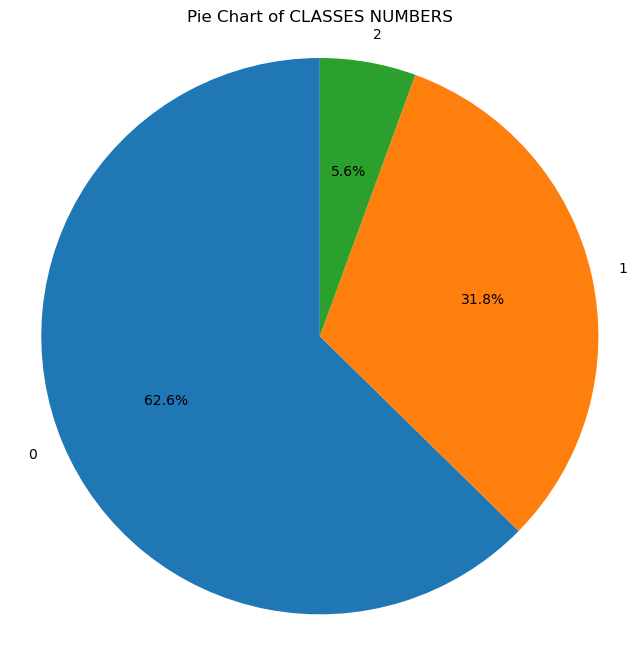

In [17]:
import matplotlib.pyplot as plt

value_counts = filtered_data['Bed_days_category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  
plt.title('Pie Chart of CLASSES NUMBERS')
plt.show()

# XGBClassifier

In [11]:
from xgboost import XGBClassifier

X = filtered_data[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021','BedDys',
                   'Y2013','Y2012',
                   'CovidPrd']]



y = filtered_data['Bed_days_category']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)


# ارزیابی مدل
y_pred_xgb = xgb_model.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

precision_xgb = precision_score(y_test, y_pred_xgb,average='macro') 
recall_xgb = recall_score(y_test, y_pred_xgb, average='macro')
f1_xgb = f1_score(y_test, y_pred_xgb, average='macro')
print('Accuracy:', acc_xgb)
print('Confusion Matrix:\n', conf_matrix_xgb)
print('Classification Report:\n', class_report_xgb)
print('Precision:', precision_xgb)
print('Recall:', recall_xgb)
print('F1-score:', f1_xgb)

Accuracy: 0.8416604983962497
Confusion Matrix:
 [[9007 1104   16]
 [ 886 4046  229]
 [   1  331  592]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     10127
           1       0.74      0.78      0.76      5161
           2       0.71      0.64      0.67       924

    accuracy                           0.84     16212
   macro avg       0.79      0.77      0.78     16212
weighted avg       0.84      0.84      0.84     16212

Precision: 0.7852747007706148
Recall: 0.7713512667710227
F1-score: 0.7774946339791877


# LogisticRegression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming filtered_data is your DataFrame containing the features and target variable

X = filtered_data[['Age1725', 'Age2639', 'Age4064', 'Age6574', 'Age75plus',
                  'Male',
                  'Regional',
                  'April', 'December', 'February', 'January', 'July',
                  'June', 'March', 'May', 'November', 'October', 'September',
                  'Cntrprt23WldMV', 'CntrprtFxdStnry', 'CntrprtHvyVhcl',
                  'CntrprtNClsn', 'CntrprtOther', 'CntrprtNMV', 'CntrprtCrTrkVn',
                  'CntrprtPdlC', 'CntrprtPdstAnml', 'CntrprtTrn',
                  'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020', 'Y2021', 'BedDys',
                  'Y2013', 'Y2012',
                  'CovidPrd']]

y = filtered_data['Bed_days_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Evaluate the model
y_pred_lr = lr_model.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
class_report_lr = classification_report(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='macro')
recall_lr = recall_score(y_test, y_pred_lr, average='macro')
f1_lr = f1_score(y_test, y_pred_lr, average='macro')

print('Accuracy:', acc_lr)
print('Confusion Matrix:\n', conf_matrix_lr)
print('Classification Report:\n', class_report_lr)
print('Precision:', precision_lr)
print('Recall:', recall_lr)
print('F1-score:', f1_lr)

Accuracy: 0.8010115963483839
Confusion Matrix:
 [[9382  723   22]
 [1836 3209  116]
 [   0  529  395]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88     10127
           1       0.72      0.62      0.67      5161
           2       0.74      0.43      0.54       924

    accuracy                           0.80     16212
   macro avg       0.77      0.66      0.70     16212
weighted avg       0.79      0.80      0.79     16212

Precision: 0.7655893602753819
Recall: 0.6585673957094076
F1-score: 0.6961016225825615


/Users/amin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# MLPClassifier

In [32]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming filtered_data is your DataFrame containing the features and target variable

X = filtered_data[['Age1725', 'Age2639', 'Age4064', 'Age6574', 'Age75plus',
                  'Male',
                  'Regional',
                  'April', 'December', 'February', 'January', 'July',
                  'June', 'March', 'May', 'November', 'October', 'September',
                  'Cntrprt23WldMV', 'CntrprtFxdStnry', 'CntrprtHvyVhcl',
                  'CntrprtNClsn', 'CntrprtOther', 'CntrprtNMV', 'CntrprtCrTrkVn',
                  'CntrprtPdlC', 'CntrprtPdstAnml', 'CntrprtTrn',
                  'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020', 'Y2021', 'BedDys',
                  'Y2013', 'Y2012',
                  'CovidPrd']]

y = filtered_data['Bed_days_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.neural_network import MLPClassifier

# تعریف یک MLPClassifier با ساختار سفارشی
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', random_state=42)

# آموزش مدل با داده‌های آموزشی
mlp_model.fit(X_train, y_train)
mlp_model.fit(X_train, y_train)

# Evaluate the model
y_pred_mlp = mlp_model.predict(X_test)
acc_mlp = accuracy_score(y_test, y_pred_mlp)
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
class_report_mlp = classification_report(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp, average='macro')
recall_mlp = recall_score(y_test, y_pred_mlp, average='macro')
f1_mlp = f1_score(y_test, y_pred_mlp, average='macro')

print('Accuracy:', acc_mlp)
print('Confusion Matrix:\n', conf_matrix_mlp)
print('Classification Report:\n', class_report_mlp)
print('Precision:', precision_mlp)
print('Recall:', recall_mlp)
print('F1-score:', f1_mlp)

/Users/amin/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8348137182334073
Confusion Matrix:
 [[8946 1157   24]
 [ 930 3887  344]
 [   0  223  701]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89     10127
           1       0.74      0.75      0.75      5161
           2       0.66      0.76      0.70       924

    accuracy                           0.83     16212
   macro avg       0.77      0.80      0.78     16212
weighted avg       0.84      0.83      0.84     16212

Precision: 0.7665255424592324
Recall: 0.7983958945996111
F1-score: 0.7811402837523905


/Users/amin/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# DecisionTreeClassifier

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming filtered_data is your DataFrame containing the features and target variable

X = filtered_data[['Age1725', 'Age2639', 'Age4064', 'Age6574', 'Age75plus',
                  'Male',
                  'Regional',
                  'April', 'December', 'February', 'January', 'July',
                  'June', 'March', 'May', 'November', 'October', 'September',
                  'Cntrprt23WldMV', 'CntrprtFxdStnry', 'CntrprtHvyVhcl',
                  'CntrprtNClsn', 'CntrprtOther', 'CntrprtNMV', 'CntrprtCrTrkVn',
                  'CntrprtPdlC', 'CntrprtPdstAnml', 'CntrprtTrn',
                  'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020', 'Y2021', 'BedDys',
                  'Y2013', 'Y2012',
                  'CovidPrd']]

y = filtered_data['Bed_days_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate the model
y_pred_dt = dt_model.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='macro')
recall_dt = recall_score(y_test, y_pred_dt, average='macro')
f1_dt = f1_score(y_test, y_pred_dt, average='macro')

print('Accuracy:', acc_dt)
print('Confusion Matrix:\n', conf_matrix_dt)
print('Classification Report:\n', class_report_dt)
print('Precision:', precision_dt)
print('Recall:', recall_dt)
print('F1-score:', f1_dt)

Accuracy: 0.7800394769306687
Confusion Matrix:
 [[8737 1355   35]
 [1393 3408  360]
 [  24  399  501]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86     10127
           1       0.66      0.66      0.66      5161
           2       0.56      0.54      0.55       924

    accuracy                           0.78     16212
   macro avg       0.69      0.69      0.69     16212
weighted avg       0.78      0.78      0.78     16212

Precision: 0.6932700303503841
Recall: 0.6884293660055714
F1-score: 0.6908057409596274


# RandomForestClassifier

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming filtered_data is your DataFrame containing the features and target variable

X = filtered_data[['Age1725', 'Age2639', 'Age4064', 'Age6574', 'Age75plus',
                  'Male',
                  'Regional',
                  'April', 'December', 'February', 'January', 'July',
                  'June', 'March', 'May', 'November', 'October', 'September',
                  'Cntrprt23WldMV', 'CntrprtFxdStnry', 'CntrprtHvyVhcl',
                  'CntrprtNClsn', 'CntrprtOther', 'CntrprtNMV', 'CntrprtCrTrkVn',
                  'CntrprtPdlC', 'CntrprtPdstAnml', 'CntrprtTrn',
                  'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020', 'Y2021', 'BedDys',
                  'Y2013', 'Y2012',
                  'CovidPrd']]

y = filtered_data['Bed_days_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro')
recall_rf = recall_score(y_test, y_pred_rf, average='macro')
f1_rf = f1_score(y_test, y_pred_rf, average='macro')

print('Accuracy:', acc_rf)
print('Confusion Matrix:\n', conf_matrix_rf)
print('Classification Report:\n', class_report_rf)
print('Precision:', precision_rf)
print('Recall:', recall_rf)
print('F1-score:', f1_rf)

Accuracy: 0.8207500616827041
Confusion Matrix:
 [[9046 1065   16]
 [1169 3753  239]
 [  11  406  507]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89     10127
           1       0.72      0.73      0.72      5161
           2       0.67      0.55      0.60       924

    accuracy                           0.82     16212
   macro avg       0.76      0.72      0.74     16212
weighted avg       0.82      0.82      0.82     16212

Precision: 0.7561257335591279
Recall: 0.7230472020141331
F1-score: 0.7377024812857055


# svm

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming filtered_data is your DataFrame containing the features and target variable

X = filtered_data[['Age1725', 'Age2639', 'Age4064', 'Age6574', 'Age75plus',
                  'Male',
                  'Regional',
                  'April', 'December', 'February', 'January', 'July',
                  'June', 'March', 'May', 'November', 'October', 'September',
                  'Cntrprt23WldMV', 'CntrprtFxdStnry', 'CntrprtHvyVhcl',
                  'CntrprtNClsn', 'CntrprtOther', 'CntrprtNMV', 'CntrprtCrTrkVn',
                  'CntrprtPdlC', 'CntrprtPdstAnml', 'CntrprtTrn',
                  'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020', 'Y2021', 'BedDys',
                  'Y2013', 'Y2012',
                  'CovidPrd']]

y = filtered_data['Bed_days_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an SVM classifier
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Evaluate the model
y_pred_svm = svm_model.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='macro')
recall_svm = recall_score(y_test, y_pred_svm, average='macro')
f1_svm = f1_score(y_test, y_pred_svm, average='macro')

print('Accuracy:', acc_svm)
print('Confusion Matrix:\n', conf_matrix_svm)
print('Classification Report:\n', class_report_svm)
print('Precision:', precision_svm)
print('Recall:', recall_svm)
print('F1-score:', f1_svm)

Accuracy: 0.7786207747347643
Confusion Matrix:
 [[8588 1515   24]
 [1212 3775  174]
 [   0  664  260]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86     10127
           1       0.63      0.73      0.68      5161
           2       0.57      0.28      0.38       924

    accuracy                           0.78     16212
   macro avg       0.69      0.62      0.64     16212
weighted avg       0.78      0.78      0.78     16212

Precision: 0.6926798882132631
Recall: 0.6202875646876383
F1-score: 0.6391582140797066


In [30]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


# Create the list of base models
base_models = [
    #('logreg', LogisticRegression(random_state=42)),
    #('ridge', RidgeClassifier(random_state=42)),
    #('sgd', SGDClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42)),
    #('gb', GradientBoostingClassifier(random_state=42)),
    ('ab', AdaBoostClassifier(random_state=42)),
    #('hgb', HistGradientBoostingClassifier(random_state=42)),
    #('et', ExtraTreesClassifier(random_state=42)),
    ('xgb', XGBClassifier(random_state=42)),
    #('lgbm', LGBMClassifier(random_state=42)),
    #('cb', CatBoostClassifier(random_state=42, verbose=0)),  # verbose=0 to silence CatBoost output
    #('knn', KNeighborsClassifier()),
    #('svc', SVC(probability=True, random_state=42)),
    #('gnb', GaussianNB()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', random_state=42)),
    #('dt', DecisionTreeClassifier(random_state=42)),
]

# Use the VotingClassifier with the base models
voting_model = VotingClassifier(estimators=base_models, voting='soft')

# Train the voting model
voting_model.fit(X_train, y_train)

# Evaluate the voting model
y_pred = voting_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(class_report)
print('Accuracy:', acc)
print('Confusion Matrix:\n', conf_matrix)

/Users/amin/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.90      0.89      0.90     10127
           1       0.74      0.77      0.75      5161
           2       0.70      0.67      0.69       924

    accuracy                           0.84     16212
   macro avg       0.78      0.78      0.78     16212
weighted avg       0.84      0.84      0.84     16212

Accuracy: 0.8403034789045152
Confusion Matrix:
 [[9039 1073   15]
 [ 951 3966  244]
 [   0  306  618]]


In [31]:
f1 = f1_score(y_test, y_pred, average='macro')
f1

0.779975160099501